In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg 


In [20]:
data = pd.read_csv('data/The_Actual_Final_Dataset2.csv')
data.fillna('No')
data.head()
data= data[data['Inflation_Adj_Cost1'] != 0]


In [21]:
data.columns

Index(['parcel', 'bedrooms', 'bathrooms', 'living_area', 'total_value',
       'half_baths', 'construction_quality', 'condition_score', 'garage_type',
       'finished_basement_No', 'total_land', 'zipcodes', 'house_age',
       'Inflation_Adj_Cost1', 'Inflation_Adj_Cost2'],
      dtype='object')

In [22]:
#data2 = pd.get_dummies(data)
#data2.head()
#data2['Inflation_Adj_Cost1']= data2['Inflation_Adj_Cost1'].astype('int')
#data2['Inflation_Adj_Cost2']= data2['Inflation_Adj_Cost2'].astype('int')


#data2

In [23]:
#Took about total value because that's the whole point of the project

X = data[['bedrooms', 'bathrooms', 'living_area',
       'half_baths', 'construction_quality',
       'condition_score', 'garage_type', 'finished_basement_No', 'total_land',
       'zipcodes', 'house_age']]
y = data['Inflation_Adj_Cost1'].values.reshape(-1, 1)
print(X.shape, y.shape)

(7988, 11) (7988, 1)


In [24]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION
print(X_train)

       bedrooms  bathrooms  living_area  half_baths  construction_quality  \
7229          4          2         2467           1                     7   
8430          3          2         2112           0                     5   
6081          3          1         1500           1                     4   
6620          3          1         1160           0                     5   
8616          4          1         2120           2                     7   
9618          6          2         4842           2                     7   
947           3          1         1468           0                     5   
8349          3          1         1788           1                     6   
3489          4          2         2162           1                     7   
11692         4          1         1440           1                     5   
1090          3          1         1320           1                     5   
4356          3          1         1314           1                     4   

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION'

In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION
print(X_train_scaled)

[[ 1.03068326  0.78511202  0.79480649 ...  0.22199619 -0.66333322
  -1.5351494 ]
 [-0.3339186   0.78511202  0.34406339 ...  3.90836965 -0.66333322
   0.46348832]
 [-0.3339186  -0.74800601 -0.43299232 ...  0.56748088 -1.23218941
   0.09164874]
 ...
 [ 1.03068326 -0.74800601 -0.1231858  ... -0.52344079  1.04323534
   0.32404848]
 [-0.3339186  -0.74800601 -0.0114523  ... -0.2448241  -1.8010456
  -0.37315073]
 [-0.3339186  -0.74800601 -0.35681039 ... -0.36411914  1.04323534
  -0.23371089]]


In [27]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

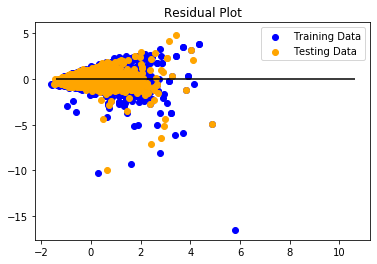

In [28]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [29]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4443193870274427, R2: 0.5874345362972038


In [30]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4463913478900099, R2: 0.5855106510943593


In [31]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4443192719521444, R2: 0.5874346431484807


In [32]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4448783271418033, R2: 0.5869155416411165


In [33]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4448783271418033, R2: 0.5869155416411165


In [34]:
data.columns

Index(['parcel', 'bedrooms', 'bathrooms', 'living_area', 'total_value',
       'half_baths', 'construction_quality', 'condition_score', 'garage_type',
       'finished_basement_No', 'total_land', 'zipcodes', 'house_age',
       'Inflation_Adj_Cost1', 'Inflation_Adj_Cost2'],
      dtype='object')

In [35]:
# 1. bedrooms
# 2. bathrooms
# 3. living_area
# 5. half_baths
# 6. construction_quality
# 7. condition_score
# 8. garage_type
# 9. finished_basement_No 
# 10. total_land
# 11. zipcodes
# 12. house_age

In [75]:
Sample = np.array([[3,1,1932,1,5,6,2,2,10800,6,71]])
SS = X_scaler.transform(Sample)
SS
Outcome = y_scaler.inverse_transform(elasticnet.predict(SS))

Outcome

array([217774.82777993])

## 